In [8]:
import numpy as np
import h5py
import time
from scipy.stats import pearsonr

In [3]:
path='//ZMN-HIVE/User-Data/Maria/Registered/fish17_6dpf_medium_aligned_andreas.h5'

In [7]:
with h5py.File(path, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    start=time.time()
    data=f['data'][:,10,:,:]
    end=time.time()
    print('Time to load file: ',end-start)

Keys: <KeysViewHDF5 ['data']>
Time to load file:  91.02461838722229


In [19]:
def correlation(data,pixel_index):
    corr_im=np.zeros((1024,1024))
    reference=data[:,pixel_index[0],pixel_index[1]].flatten()
    print(reference.shape)
    print(data[:,0,0].flatten().shape)
    for pixel_x in range(0,1024):
        for pixel_y in range(0,1024):
            
            #print(pixel_x)
            #print(pearsonr(reference,data[:,pixel_x,pixel_y].flatten()))
            corr_im[pixel_x,pixel_y]=pearsonr(reference,data[:,pixel_x,pixel_y].flatten())[0]
    return corr_im

corr_im=correlation(data,[500,500])

(1800,)
(1800,)


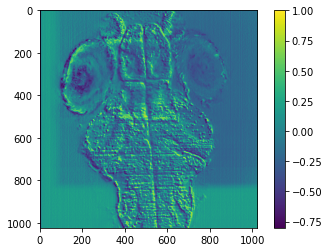

In [21]:
import matplotlib.pyplot as plt


plt.imshow(corr_im)
plt.colorbar()

(2008,)


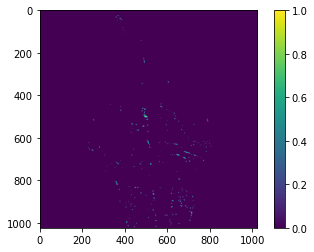

In [38]:
thr=corr_im.copy()
thr[thr<0.75]=0
print(thr[thr!=0].shape)
plt.imshow(thr)
plt.colorbar()

(array([7.74000e+03, 4.55950e+04, 1.41062e+05, 3.25046e+05, 1.97454e+05,
        2.33647e+05, 5.31430e+04, 3.11990e+04, 1.35700e+04, 1.20000e+02]),
 array([-0.8010895 , -0.62098055, -0.4408716 , -0.26076265, -0.0806537 ,
         0.09945525,  0.2795642 ,  0.45967315,  0.6397821 ,  0.81989105,
         1.        ]),
 <a list of 10 Patch objects>)

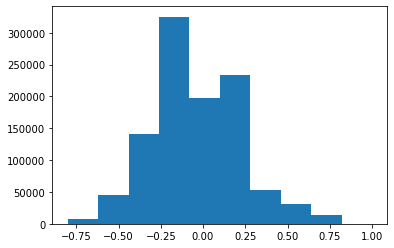

In [27]:
plt.hist(corr_im.flatten())